In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 33)
X_train.shape

(117, 2)

In [18]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import numpy as np

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.93 (+/- 0.04) [Logistic Regression]
Accuracy: 0.91 (+/- 0.06) [Random Forest]
Accuracy: 0.91 (+/- 0.07) [Naive Bayes]


In [19]:
votingClf = VotingClassifier(estimators = [('lr',clf1), ('rf',clf2),('gnb',clf3)], voting = 'hard')

In [22]:
votingClf = votingClf.fit(X_train,y_train)
y_pred = votingClf.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix

cnfTest = confusion_matrix(y_test,y_pred)
cnfTest

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  3, 10]])

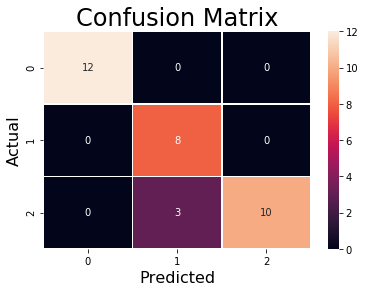

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.axes()
svm = sns.heatmap(cnfTest,annot=True,fmt="d", linewidths=.5,ax=ax)
ax.set_title('Confusion Matrix',fontsize = 24)
plt.xlabel('Predicted', fontsize = 16)
plt.ylabel('Actual', fontsize = 16)
figure = svm.get_figure()  